In [14]:
import numpy as np
import os
from PIL import Image
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import random

In [13]:
def draw_border(img, pt1, pt2, color, thickness, r, d):
    x1,y1 = pt1
    x2,y2 = pt2
    len_x =x2-x1
    len_y =y2-y1    
    # Top left
    cv2.line(img, (x1 + r, y1), (x1 + len_x//2, y1), color, thickness)
    cv2.line(img, (x1, y1 + r), (x1, y1 + len_y//2), color, thickness)
    cv2.ellipse(img, (x1 + r, y1 + r), (r, r), 180, 0, 90, color, thickness) 
    # Top right
    cv2.line(img, (x2 - r, y1), (x2 - len_x//2, y1), color, thickness)
    cv2.line(img, (x2, y1 + r), (x2, y1 + len_y//2), color, thickness)
    cv2.ellipse(img, (x2 - r, y1 + r), (r, r), 270, 0, 90, color, thickness) 
    # Bottom left
    cv2.line(img, (x1 + r, y2), (x1 + len_x//2, y2), color, thickness)
    cv2.line(img, (x1, y2 - r), (x1, y2 - len_y//2), color, thickness)
    cv2.ellipse(img, (x1 + r, y2 - r), (r, r), 90, 0, 90, color, thickness) 
    # Bottom right
    cv2.line(img, (x2 - r, y2), (x2 - len_x//2, y2), color, thickness)
    cv2.line(img, (x2, y2 - r), (x2, y2 - len_y//2), color, thickness)
    cv2.ellipse(img, (x2 - r, y2 - r), (r, r), 0, 0, 90, color, thickness)
    #print ('len_x is ',len_x, 'len_y is', len_y,' delta x is',  get_delta(len_x),'delta y is', get_delta(len_y))
    return img

In [15]:
all_backgrounds = [[128, 128, 128], [190, 190, 190], 
                   [133, 133, 133], [84, 84, 84], 
                   [112, 128, 144], [153, 149, 140], 
                   [187, 187, 187], [192, 192, 192], 
                   [240, 240, 240], [224, 224, 224], 
                   [211, 211, 211], [119, 136, 153],
                   [198, 226, 255], [185, 211, 238],
                   [159, 182, 205], [108, 123, 139], 
                   [128, 128, 128], [0, 128, 0], 
                   [0, 255, 0], [128, 0, 0], 
                   [0, 0, 128], [0, 0, 0], 
                   [0, 0, 255], [128, 128, 128],
                   [0, 128, 128], [255, 255, 255]]

In [17]:
def random_round_rectangles(x ,y, base_size = 15, cicles = 30, max_number_of_element = 8): 
    
    
    def random_3d(a,b, backgrounds):
        color = random.choice(backgrounds)  
        
        def two_d(size, back):
            line = []
            for i in range (size):
                line += [back]
            return line    
        
        res = []
        for i in range (a):
            res += [two_d(b,color)]
            
        res = np.asarray(res)  
        res = np.uint8(res)    
        return res
    
    
    def get_coordinate(x1,x2,y1,y2):
        return [[i,j] for i in range(x1,x2) for j in range(y1,y2)]

    def get_center(x2,y2,length):
        return ((x2)-length, (y2)-length)

    def delta(first,second):
        return [i for i in first if i not in second]     
    
    output = {}
    zero_area = random_3d(x,y,all_backgrounds)
    possible_area = get_coordinate(0,y,0,x)
    possible_color = [0,255]
    res = zero_area    
    counter = 0
    possible_size = [1,2,3,4,5,6,7,8,9,10]
    possible_fill = [1,-1]  
    figure_type = [0,1,2]
    is_long_rectangle = [1,2,3,4]

    for i in range(cicles):  
        choice = random.choice(possible_area)
        start_point = (choice[0],choice[1])
        size = base_size+random.choice(possible_size)
        end_point = (choice[0]+size*random.choice(is_long_rectangle), choice[1]+size)
        range_between = 6
        center = (get_center(end_point[0],end_point[1],size//2))
        rect_area = get_coordinate(start_point[0]-range_between,end_point[0]+range_between,
                                   start_point[1]-range_between,end_point[1]+range_between)        
        this_delta = delta(rect_area, possible_area) 
        possible_radius = [1,2,3,4,5]
        
        
        if len(this_delta) == 0:    
            counter += 1
            color = (random.choice(possible_color), random.choice(possible_color), random.choice(possible_color)) 
            thickness = random.choice(possible_fill)
            radius = size//random.choice(possible_radius)    
            
            if random.choice(figure_type) == 0:
                res = cv2.rectangle(res, start_point, end_point, color, thickness)  
                output[counter] = {'figure':'rectangle', 'start_point':start_point,
                                  'end_point':end_point, 'color':color}
                    
            elif random.choice(figure_type) == 1:    
                res = draw_border(res, start_point, end_point, color, 1, 5, 10)
                #print (start_point, end_point)
                output[counter] = {'figure':'round_rectangle', 'start_point':start_point,
                                  'end_point':end_point, 'color':color}
                    
            else:
                res = cv2.circle(res, center, radius, color, thickness)  
                output[counter] = {'figure':'circle', 'center':center,
                                  'radius':radius, 'color':color}
                
            possible_area = delta(possible_area,rect_area)               
            if counter == max_number_of_element:
                break
            else:
                continue        
        else:
            continue
    return Image.fromarray(res), output 

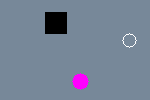

In [19]:
random_round_rectangles(100,150)[0]

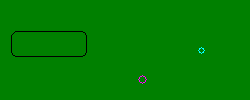

In [22]:
random_round_rectangles(100,250)[0]

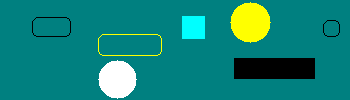

In [24]:
random_round_rectangles(100,350)[0]

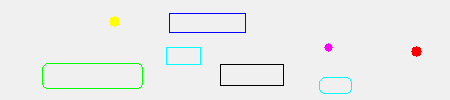

In [25]:
random_round_rectangles(100,450)[0]